In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from glob import iglob
from qvalue import estimate
THRESH = 0.1

/Users/mikesivley/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# # Load all structural p-values across both analyses
# df = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-06-30/tonycons/tonycons_K_summary.txt",delimiter='\t')
# df = df.drop_duplicates(["structid","chain"])

In [3]:
# Load all structural p-values across both analyses
df = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/tonycons_specialK_2016-08-31/tonycons_K_summary.txt",delimiter='\t')
df = df.drop_duplicates(["structid","chain"])

In [4]:
print "Number of structures evaluated:"
print len(df)
print "Number of variants evluated:"
print "%.0f"%np.sum(df["N"])

df.ix[~df[ "Kp"].isnull(),"Kq"],K_lam,K_pi = estimate(df.ix[~df[ "Kp"].isnull(),"Kp"].values)
print "\nProteins passing an FDR of %.0f%% for the unweighted analysis"%(THRESH*100)
print "Total:   %4d"%( df['Kq']<THRESH).sum()
print "    Clustered: %4d"%((df['Kq']<THRESH) & (df["Kz"]>0)).sum()
print "    Dispersed: %4d"%((df['Kq']<THRESH) & (df["Kz"]<0)).sum()

df.ix[~df["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(df.ix[~df["wKp"].isnull(),"wKp"].values)                                          
print "\nProteins passing an FDR of %.0f%% for the weighted analysis"%(THRESH*100)
print "Total:   %4d"%( df['wKq']<THRESH).sum()
print "    Clustered: %4d"%((df['wKq']<THRESH) & (df["wKz"]>0)).sum()
print "    Dispersed: %4d"%((df['wKq']<THRESH) & (df["wKz"]<0)).sum()

Number of structures evaluated:
4294
Number of variants evluated:
927582

Proteins passing an FDR of 10% for the unweighted analysis
Total:      0
    Clustered:    0
    Dispersed:    0

Proteins passing an FDR of 10% for the weighted analysis
Total:   4290
    Clustered: 3968
    Dispersed:  322


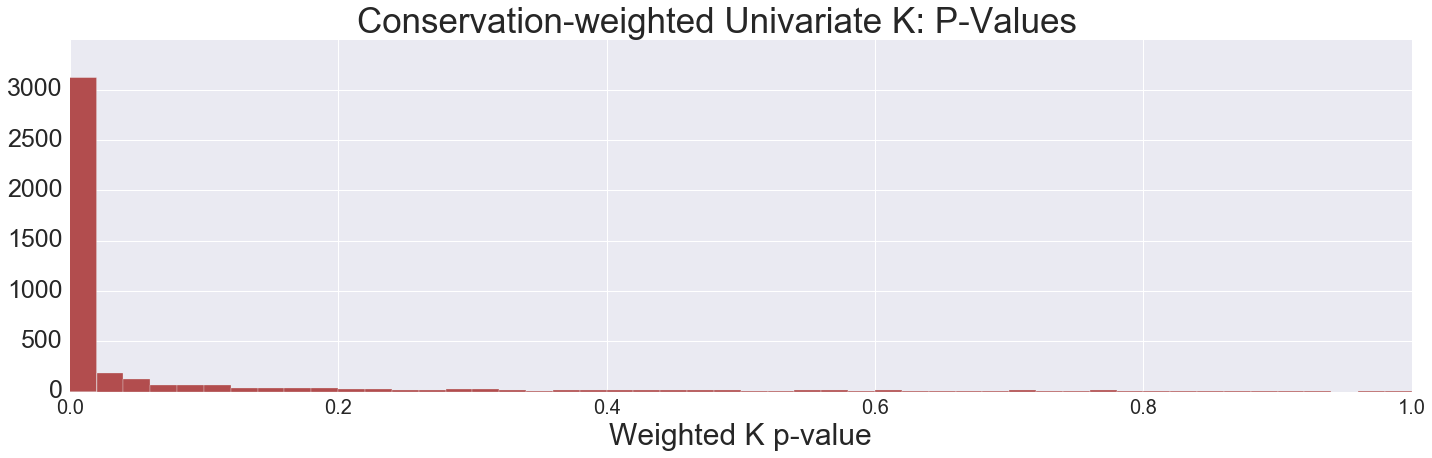

In [55]:
# P-Value Distributions
pal = list(sns.color_palette("Set1", n_colors=1, desat=.5))
fig,ax = plt.subplots(1,1,figsize=(20,6))
plt.suptitle("Conservation-weighted Univariate K: P-Values",fontsize=35,y=1.05)
ax.set_xlabel("Weighted K p-value",fontsize=30)
ax.hist(df.ix[~df["wKp"].isnull(),"wKp"],bins=np.arange(0,1.02,0.02),color=pal[0])
ax.set_yticklabels(range(0,3500,500),fontsize=25)
# ax.plot(wK_lam,wK_pi,lw=3,c='black')
plt.tight_layout()
plt.show()

In [6]:
def prep_split(dfx):
    df  = dfx.copy()
    df['fdr']  = 'All              (N=%4d)'%len(df)
    dft = dfx[dfx["wKq"]<0.1].copy()
    dft['fdr'] = 'FDR < 0.1 (N=%4d)'%len(dft)
    df = pd.concat((df,dft)).dropna(subset=["wKz"])
    df['dummy'] = ''
    return df

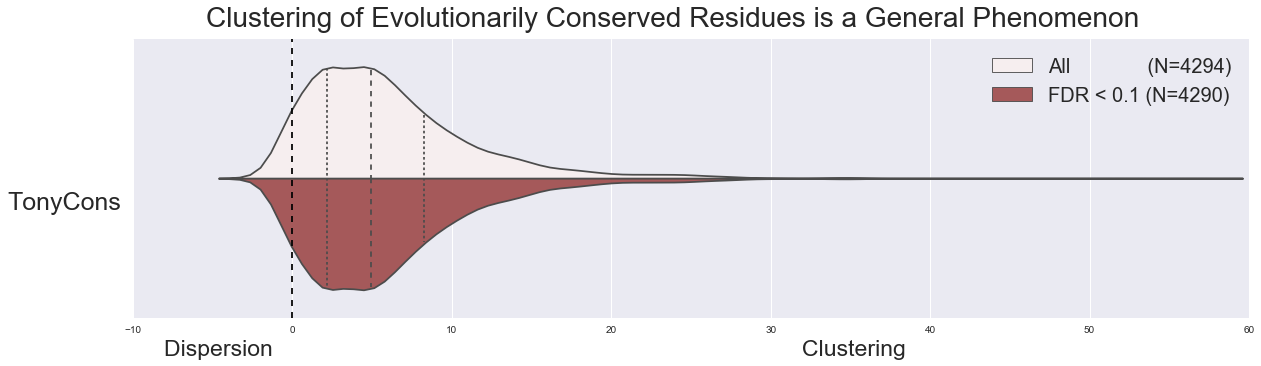

In [7]:
# Setup the plot
fig,ax = plt.subplots(figsize=(20,5),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=3, desat=.5))

# Plot the FDR-significant K for RSA-weighted residues
tdf = prep_split(df)
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[0],split=True,scale='width',cut=0,ax=ax)
tdf.ix[tdf['fdr']!='FDR < 0.1','Kz'] = np.nan
# sns.stripplot(x='wKz',y='dummy',hue='fdr',data=tdf,jitter=True,linewidth=1,color=pal[0],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax)
ax.set_ylabel("TonyCons",fontsize=25,rotation='horizontal',ha='right',y=0.37)
handles, labels = ax.get_legend_handles_labels()
ax.legend(fontsize=20,handles=handles[:2])
ax.axvline(0.,ls='dashed',c='black')
plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Dispersion%sClustering%s"%(' '*83,' '*49),fontsize=23)
plt.suptitle("Clustering of Evolutionarily Conserved Residues is a General Phenomenon",fontsize=28,y=0.99)
plt.show()

In [8]:
print "Weighted: FDR-Significantly Clustered Proteins"
print df.ix[(df["wKq"]<0.1) & (df["wKz"]>0),["structid","chain","Kz","Kp","Kq"]]

Weighted: FDR-Significantly Clustered Proteins
     structid chain   Kz   Kp   Kq
0        6RLX     B  1.0  1.0  1.0
1        2L43     A -1.0  1.0  1.0
4        3SL9     F  NaN  1.0  1.0
5        4GU0     E  1.0  1.0  1.0
6        2LCM     A  NaN  1.0  1.0
8        2DAH     A -1.0  1.0  1.0
9        1N0Z     A -1.0  1.0  1.0
10       1UJD     A -1.0  1.0  1.0
11       2M3O     W -1.0  1.0  1.0
12       1HY9     A -1.0  1.0  1.0
13       2K1P     A -1.0  1.0  1.0
14       3DDT     A  NaN  1.0  1.0
15       3PHD     G  NaN  1.0  1.0
17       2M6N     A  1.0  1.0  1.0
18       3JWQ     C  1.0  1.0  1.0
20       2EPT     A -1.0  1.0  1.0
21       2YRG     A -1.0  1.0  1.0
22       1J8E     A -1.0  1.0  1.0
24       1WGL     A  NaN  1.0  1.0
25       2OOB     A -1.0  1.0  1.0
26       1AFO     B -1.0  1.0  1.0
27       1X4P     A -1.0  1.0  1.0
28       1ZMQ     C -1.0  1.0  1.0
29       2KNX     A  1.0  1.0  1.0
30       2L86     A -1.0  1.0  1.0
31       2V5P     C -1.0  1.0  1.0
32      

In [9]:
print "Weighted: FDR-Significantly Dispersed Proteins"
print df.ix[(df["wKq"]<0.1) & (df["wKz"]<0),["structid","chain","wKz","wKp","wKq"]]

Weighted: FDR-Significantly Dispersed Proteins
     structid chain       wKz      wKp       wKq
2        2LL2     A -1.661133  0.09648  0.007151
3        1RMJ     A -1.035828  0.30756  0.020748
16       1EDM     B -0.328857  0.93424  0.057574
19       1L4T     A -0.640892  0.45770  0.029935
23       1HZN     A -0.756067  0.46086  0.030119
36       2LP1     A -0.905400  0.36786  0.024496
42       2KOE     A -0.559259  0.63008  0.040143
52       2LE3     A -1.366452  0.16980  0.011992
68       3A2A     C -0.567816  0.60692  0.038818
78       2JWA     A -3.788308  0.00002  0.000004
81       2EQ3     A -0.067878  0.98532  0.060594
85       2J5D     A -0.913629  0.36946  0.024584
92       3DXC     B -0.726308  0.87798  0.054348
105      2H4M     D -0.627747  0.53958  0.034874
107      2L2L     A -0.563351  0.61826  0.039438
109      2YTP     A -0.301389  0.78908  0.049308
120      4B6D     E -0.295050  0.41182  0.027164
124      4N6J     A -0.666877  0.52004  0.033686
129      2REL     A -0